<a href="https://colab.research.google.com/github/financieras/python_financiero/blob/main/finanzas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTRATEGIAS DE TRADING CON PYTHON
## Librería TA-Lib: Technical Analysis Library
Utilizaremos la librería TA-Lib

In [1]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   2248      0 --:--:-- --:--:-- --:--:--  2235
100   355  100   355    0     0   1075      0 --:--:-- --:--:-- --:--:--  1075
100 1299k  100 1299k    0     0  1199k      0  0:00:01  0:00:01 --:--:-- 1199k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [2]:
!pip install yfinance       # para cargar la librería de Yahoo finance en el entorno de Colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.4 MB/s eta 0:00:00


In [9]:
import talib as ta                # importamos la librería con el alias ta
import numpy as np
import matplotlib.pyplot as plt   # importamos pyplot de la librería matplotlib con el alias plt
import yfinance as yf             # importamos la librería de Yahoo finance con el alias yf

In [4]:
msft = yf.Ticker("MSFT")

# Obtener información de mercado de un ticker concreto
msft.info         # información sobre Microsoft Corporation

Exception: ignored

In [5]:
# get historical market data
hist = msft.history(period="max")
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.055241    0.063365    0.055241    0.060657   
1986-03-14 00:00:00-05:00    0.060657    0.063907    0.060657    0.062823   
1986-03-17 00:00:00-05:00    0.062823    0.064448    0.062823    0.063907   
1986-03-18 00:00:00-05:00    0.063907    0.064448    0.061740    0.062281   
1986-03-19 00:00:00-05:00    0.062281    0.062823    0.060657    0.061198   
...                               ...         ...         ...         ...   
2023-03-16 00:00:00-04:00  265.209991  276.559998  263.279999  276.200012   
2023-03-17 00:00:00-04:00  278.260010  283.329987  276.320007  279.429993   
2023-03-20 00:00:00-04:00  276.980011  277.480011  269.850006  272.230011   
2023-03-21 00:00:00-04:00  274.880005  275.000000  269.519989  273.779999   
2023-03-22 00:00:00-04:00  273.399994  279.989990  272.630005  277.079987   

In [6]:
# show news
msft.news

[{'uuid': '9eb1cbe4-5d29-3f35-aaed-e74e2600f2e1',
  'title': 'Bill Gates Says AI Is the Most Revolutionary Technology in Decades',
  'publisher': 'The Wall Street Journal',
  'link': 'https://finance.yahoo.com/m/9eb1cbe4-5d29-3f35-aaed-e74e2600f2e1/bill-gates-says-ai-is-the.html',
  'providerPublishTime': 1679509440,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/HOUs7kcT_drMk7BxXKwzLA--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/wsj.com/11d4fe54f09d0d0022c6883f9d921e8e',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/.DrvCwkn2YDhHFMjUoJ8oQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/wsj.com/11d4fe54f09d0d0022c6883f9d921e8e',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['MSFT']},
 {'uuid': '965c4fa9-9b8e-3f6e-a829-3da14721dc28',
  'title': 'Microsoft, IBD Stock Of The D

In [7]:
# mostrar los resultados
msft.earnings

Exception: ignored

In [8]:
# mostrar los resultados trimestrales
msft.quarterly_earnings

""


## Gráficos: Bayesian Methods for Hackers
Uno de los estilos de gráficos de la librería matplotlib es:  
[Bayesian Methods for Hackers style sheet](https://matplotlib.org/stable/gallery/style_sheets/bmh.html?highlight=bmh)

In [10]:
np.random.seed()      # barajamos la serie de aleatorios

plt.style.use('bmh')  # establecemos este estilo de gráficos

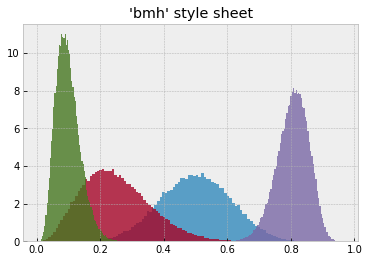

In [12]:
def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=100000),
            histtype="stepfilled", bins=100, alpha=0.8, density=True)


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()

In [14]:
# Ticker de Apple AAPL

aapl = yf.download('AAPL', start='2019-1-1', end='2023-3-22' )
print(aapl)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   38.047043   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.257282   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.719700   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.640190   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.319607   
...                ...         ...         ...         ...         ...   
2023-03-15  151.190002  153.250000  149.919998  152.990005  152.990005   
2023-03-16  152.160004  156.460007  151.639999  155.850006  155.850006   
2023-03-17  156.080002  156.740005  154.279999  155.000000  155.000000   
2023-03-20  155.070007  157.820007  154.149994  157.399994  157.399994   
2023-03-21  157.320007  159.399994  156.539

### Media Móvil
* SMA → media móvil estandar
* EMA → media móvil exponencial 

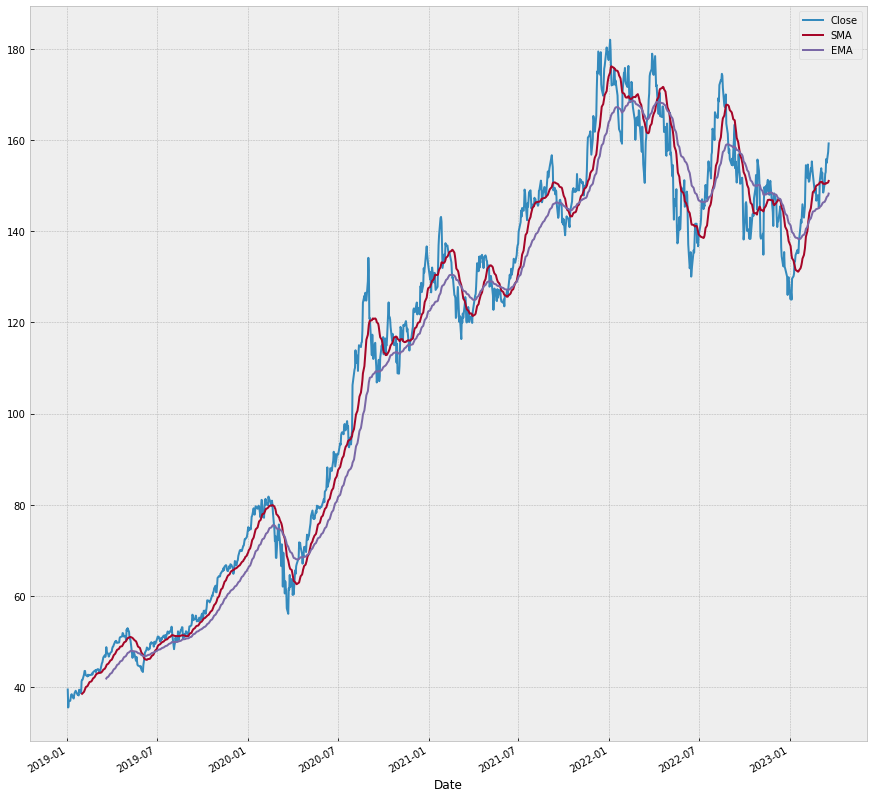

In [15]:
# la media movil estandar es SMA, a usaremos de 21 periodos
aapl['SMA'] = ta.SMA(aapl.Close.values, 21)  # también se puede poner ta.SMA(aapl['Close'])

# la media movil exponencial se llama EMA, la pondremos de 55 periodos
aapl['EMA'] = ta.EMA(aapl.Close.values, 55)

# plot
aapl[['Close', 'SMA', 'EMA']].plot(figsize=(15, 15))
plt.show()

### Bandas de Bollinger
[Bollinger Band](https://www.investopedia.com/terms/b/bollingerbands.asp)

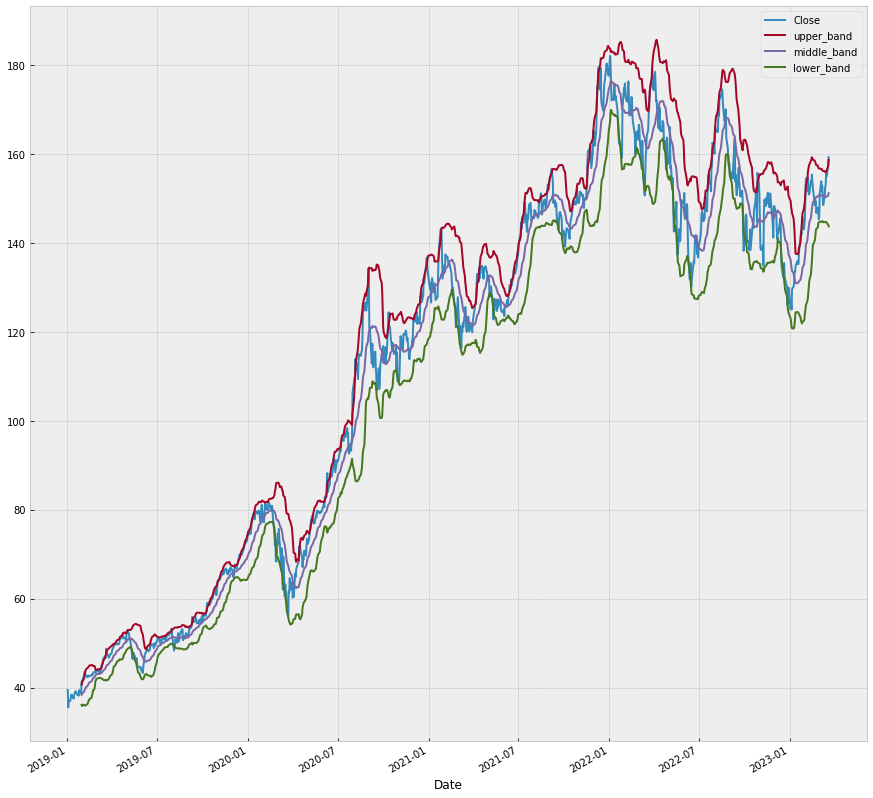

In [16]:
aapl['upper_band'], aapl['middle_band'], aapl['lower_band'] =  ta.BBANDS(aapl['Close'], timeperiod=20)
aapl[['Close', 'upper_band', 'middle_band', 'lower_band']].plot(figsize=(15, 15))
plt.show()

### RSI
[RSI](https://www.investopedia.com/terms/r/rsi.asp)

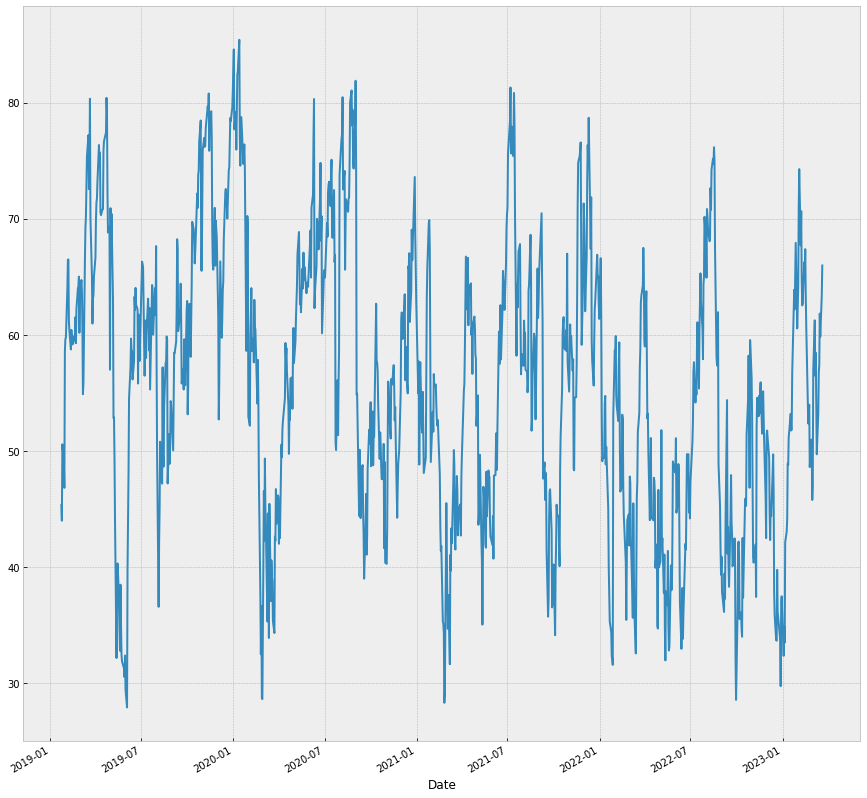

In [17]:
aapl['RSI'] = ta.RSI(aapl.Close, 14)
aapl['RSI'].plot(figsize=(15, 15))
plt.show()